Dataset sadrži sledeće informacije o kolonama:

Country (Zemlja): Kategorijalni podaci sa 20 jedinstvenih vrednosti, kao što su Brazil, Japan, Indija, Meksiko, Velika Britanija.

Year (Godina): Numerički podaci sa 10 jedinstvenih vrednosti (godine od 2010 do 2019).

GDP (USD) (BDP u USD): Numerički podaci (float) sa 200 jedinstvenih vrednosti. Primeri: 1.49 triliona, 17.56 triliona.

Population (Populacija): Numerički podaci (float) sa 199 jedinstvenih vrednosti. Primeri: 829 miliona, 897 miliona.

Life Expectancy (Očekivani životni vek): Numerički podaci (float) sa 149 jedinstvenih vrednosti. Primeri: 66.7, 61.4, 69.1 godina.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy.stats as stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

from math import sqrt
from statistics import mean, stdev
from scipy.stats import norm

In [2]:
uploaded = files.upload()

Saving world_bank_dataset.csv to world_bank_dataset.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['world_bank_dataset.csv']))
df

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [4]:
df.head()

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17


# **Priprema podataka**

In [5]:
df.describe()

,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


In [6]:
#Provera jedinstvenih vrednosti po kolonama
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'Country':
['Brazil' 'Japan' 'India' 'Mexico' 'United Kingdom' 'China' 'Indonesia'
 'Canada' 'Argentina' 'Nigeria' 'Italy' 'Turkey' 'Saudi Arabia' 'Russia'
 'France' 'United States' 'Germany' 'South Korea' 'Australia'
 'South Africa']


Unique values in column 'Year':
[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


Unique values in column 'GDP (USD)':
[1.493220e+12 1.756270e+13 1.642688e+13 1.189001e+13 2.673020e+12
 1.071180e+13 6.791480e+12 9.467220e+12 1.351403e+13 1.425720e+13
 1.380270e+13 1.933735e+13 1.049236e+13 6.052290e+12 5.800450e+12
 1.005887e+13 6.110370e+12 1.503800e+13 1.171813e+13 1.298829e+13
 1.164985e+13 6.110630e+12 8.354820e+12 1.773535e+13 1.318373e+13
 1.549940e+12 7.563440e+12 1.806421e+13 1.812030e+13 7.731710e+12
 1.963537e+13 1.323526e+13 3.299410e+12 3.323420e+12 4.359940e+12
 1.930619e+13 8.399040e+12 1.307863e+13 4.447080e+12 9.209270e+12
 1.105154e+13 2.860590e+12 1.795000e+13 3.158440e+12 1.180369e+13
 6.739310e+12 1.864929

In [7]:
specific_column = 'Unemployment Rate (%)'
specific_value = 3.81
specific_count = df[df[specific_column] == specific_value].count()
print(f"Count of {specific_value} in {specific_column}:")
print(specific_count)

Count of 3.81 in Unemployment Rate (%):
Country                                   1
Year                                      1
GDP (USD)                                 1
Population                                1
Life Expectancy                           1
Unemployment Rate (%)                     1
CO2 Emissions (metric tons per capita)    1
Access to Electricity (%)                 1
dtype: int64


In [8]:
missing_counts = df.isnull().sum()
print("Missing values in each column after replacement:")
print(missing_counts)

Missing values in each column after replacement:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


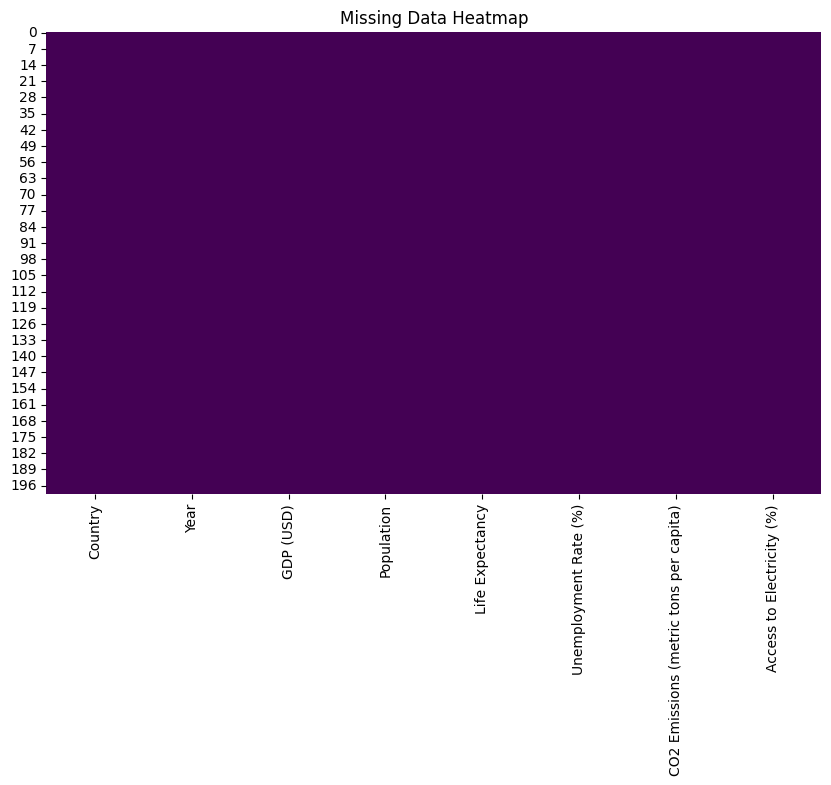

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

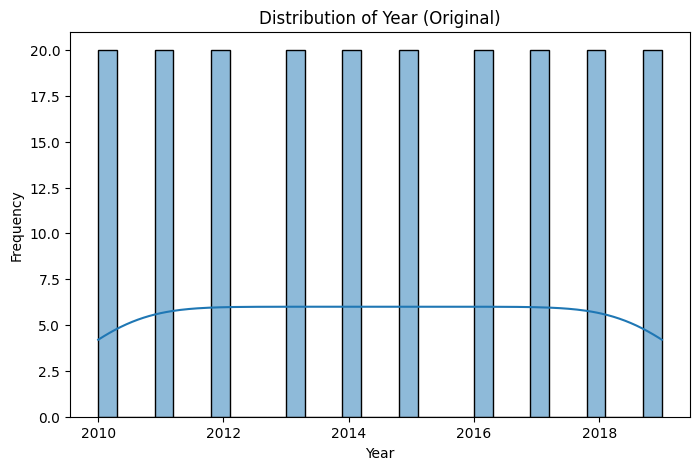

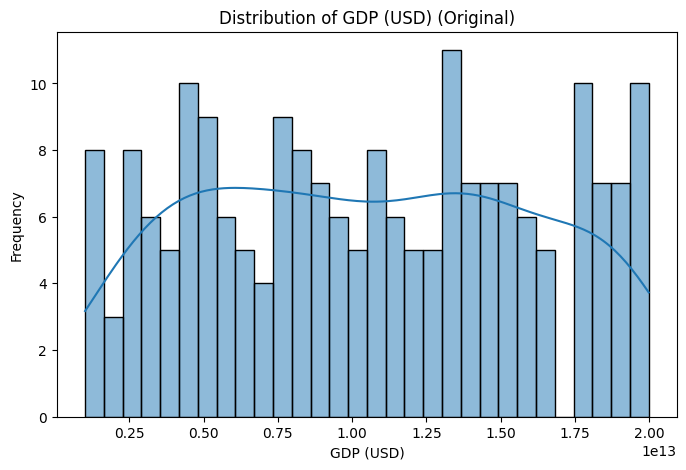

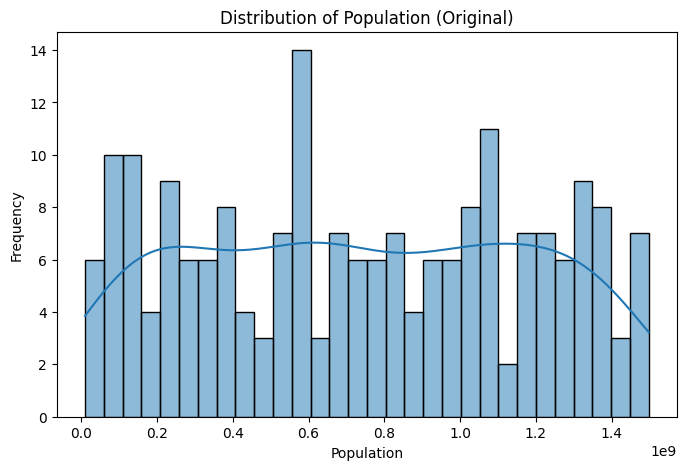

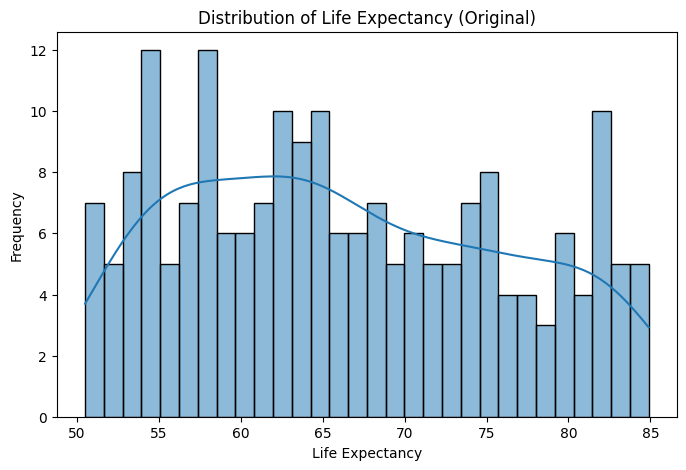

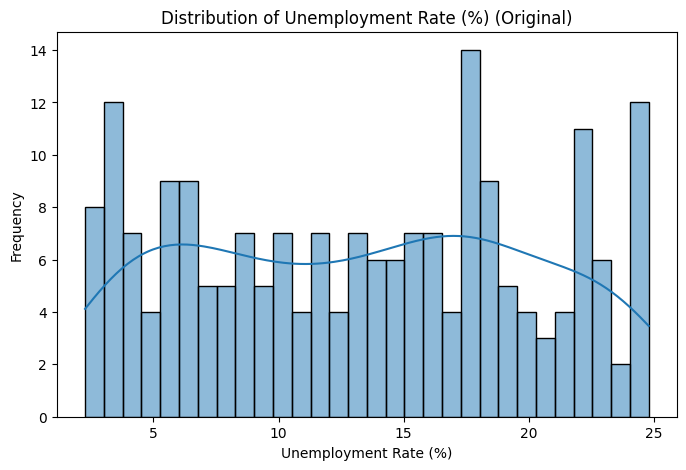

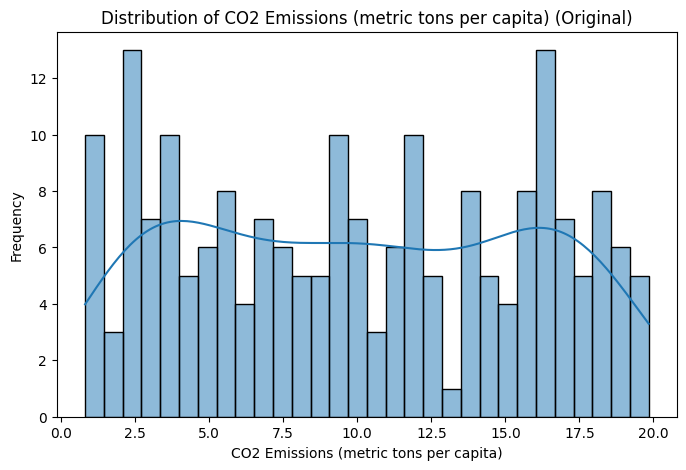

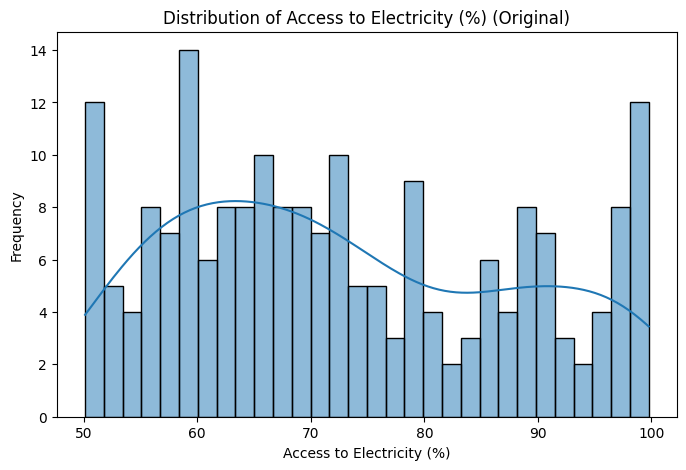

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (Original)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
outliers_info = {}
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outliers_info[column] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers Count": outliers_count
    }

outliers_df = pd.DataFrame(outliers_info).T
print("Outliers summary:")
print(outliers_df)

Outliers summary:
                                         Lower Bound   Upper Bound  \
Year                                    2.004500e+03  2.024500e+03   
GDP (USD)                              -8.116469e+12  2.892510e+13   
Population                             -7.528462e+08  2.197084e+09   
Life Expectancy                         3.268750e+01  9.958750e+01   
Unemployment Rate (%)                  -1.078875e+01  3.614125e+01   
CO2 Emissions (metric tons per capita) -1.122750e+01  3.173250e+01   
Access to Electricity (%)               2.134125e+01  1.252713e+02   

                                        Outliers Count  
Year                                               0.0  
GDP (USD)                                          0.0  
Population                                         0.0  
Life Expectancy                                    0.0  
Unemployment Rate (%)                              0.0  
CO2 Emissions (metric tons per capita)             0.0  
Access to Electricity 

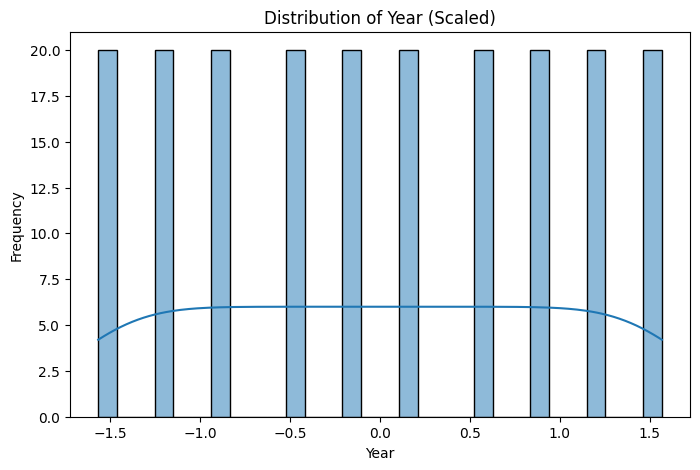

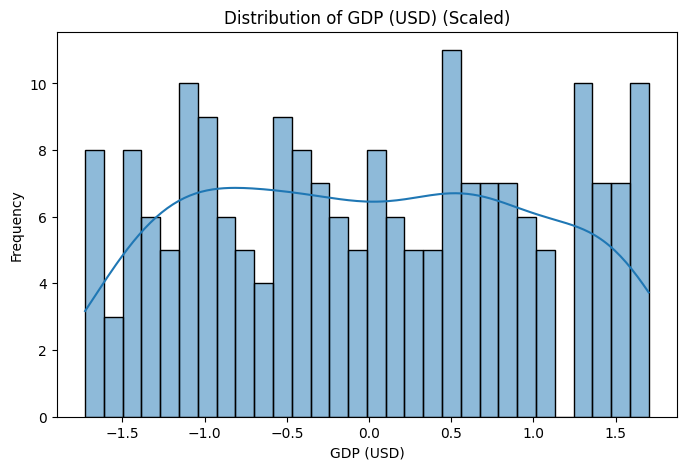

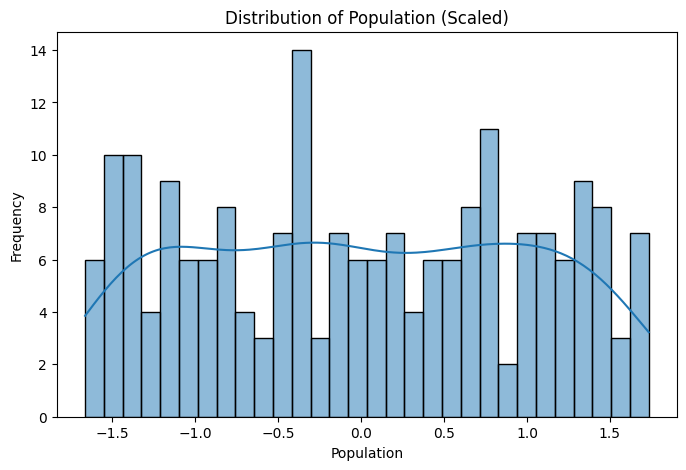

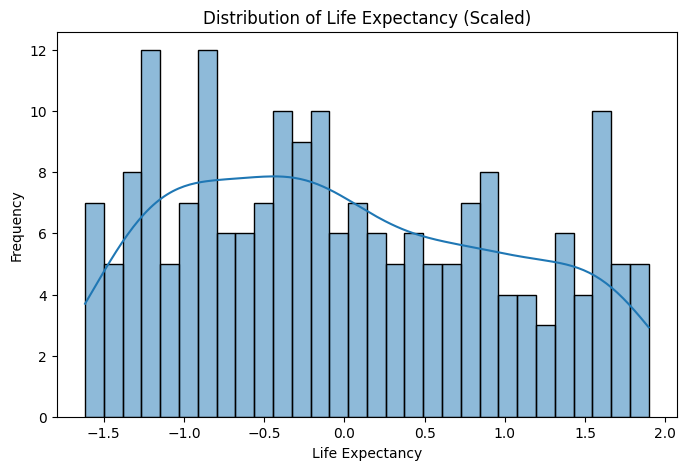

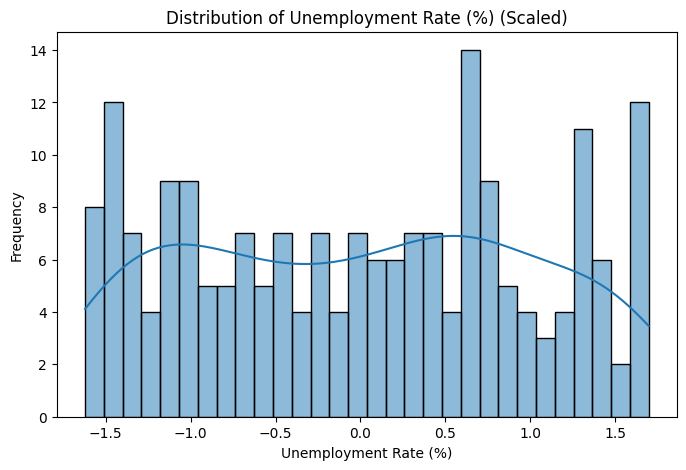

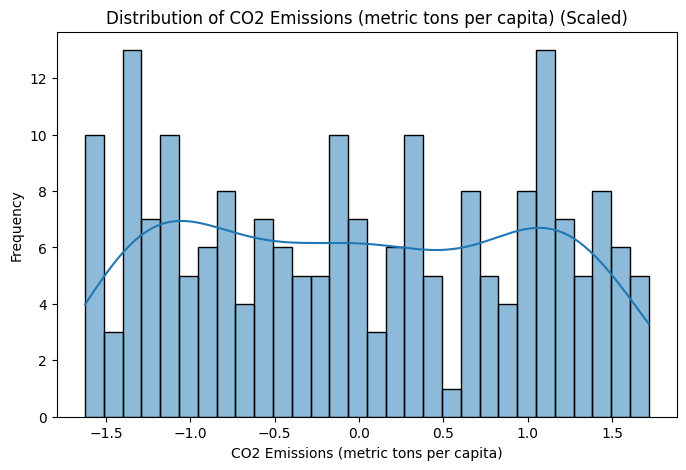

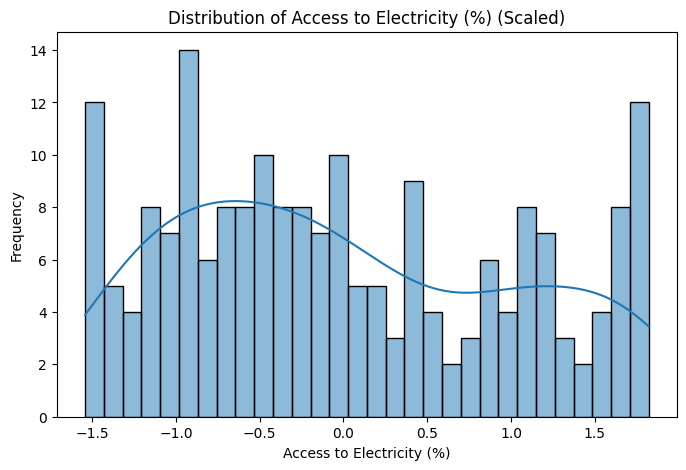

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

for column in scaled_df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(scaled_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column} (Scaled)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

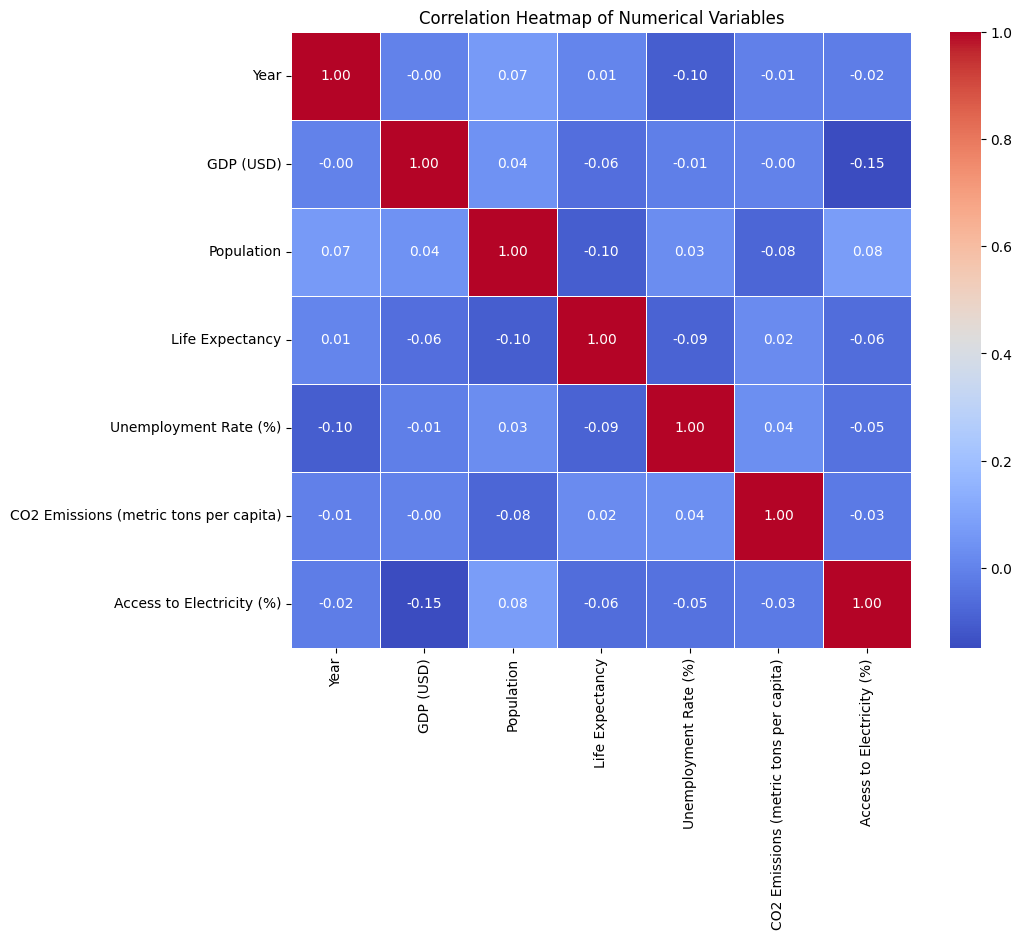

In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## **Kategorijska priprema podataka**

In [13]:
print(df['Country'].value_counts())
print(df['Country'].value_counts().describe())

Country
India             15
United Kingdom    13
Indonesia         13
Saudi Arabia      13
Italy             12
France            12
Argentina         12
United States     11
Mexico            10
Canada            10
Japan             10
Nigeria            9
Turkey             9
South Africa       8
Russia             8
China              8
Germany            7
Australia          7
Brazil             7
South Korea        6
Name: count, dtype: int64
count    20.00000
mean     10.00000
std       2.53398
min       6.00000
25%       8.00000
50%      10.00000
75%      12.00000
max      15.00000
Name: count, dtype: float64


In [14]:
print(df['Year'].value_counts())
print(df['Year'].value_counts().describe())

Year
2010    20
2011    20
2012    20
2013    20
2014    20
2015    20
2016    20
2017    20
2018    20
2019    20
Name: count, dtype: int64
count    10.0
mean     20.0
std       0.0
min      20.0
25%      20.0
50%      20.0
75%      20.0
max      20.0
Name: count, dtype: float64


In [15]:
df['Country'] = np.where(df['Country'].isin(['Brazil', 'Mexico']), 'Americas', df['Country'])
df['Country'] = np.where(df['Country'].isin(['India', 'Japan']), 'Asia', df['Country'])

In [16]:
df['Year_Group'] = np.where(df['Year'].between(2010, 2015), '2010-2015', 'Other')

In [17]:
transformed_columns_preview = df[['Country', 'Year', 'Year_Group']].head()

In [18]:
print(df['Country'].value_counts())
print(df['Country'].value_counts().describe())

Country
Asia              25
Americas          17
Saudi Arabia      13
United Kingdom    13
Indonesia         13
Argentina         12
France            12
Italy             12
United States     11
Canada            10
Turkey             9
Nigeria            9
Russia             8
China              8
South Africa       8
Germany            7
Australia          7
South Korea        6
Name: count, dtype: int64
count    18.000000
mean     11.111111
std       4.470674
min       6.000000
25%       8.000000
50%      10.500000
75%      12.750000
max      25.000000
Name: count, dtype: float64


In [19]:
print(df['Year_Group'].value_counts())
print(df['Year_Group'].value_counts().describe())

Year_Group
2010-2015    120
Other         80
Name: count, dtype: int64
count      2.000000
mean     100.000000
std       28.284271
min       80.000000
25%       90.000000
50%      100.000000
75%      110.000000
max      120.000000
Name: count, dtype: float64


# **DESKRIPTIVNA** **STATISTIKA**

In [20]:
df.head(5)

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%),Year_Group
0,Americas,2010,1.493220e+12,829020000.0,66.7,3.81,10.79,76.76,2010-2015
1,Asia,2011,1.756270e+13,897010000.0,61.4,17.98,15.67,67.86,2010-2015
2,Asia,2012,1.642688e+13,669850000.0,69.1,16.02,2.08,81.08,2010-2015
3,Americas,2013,1.189001e+13,113800000.0,80.1,6.26,19.13,53.46,2010-2015
4,Asia,2014,2.673020e+12,29710000.0,62.7,3.10,15.66,82.17,2010-2015


In [21]:
numerical_columns

Index(['Year', 'GDP (USD)', 'Population', 'Life Expectancy',
       'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)',
       'Access to Electricity (%)'],
      dtype='object')

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns

if 'y' in categorical_columns:
    categorical_columns = categorical_columns.drop('y')

categorical_columns


Index(['Country', 'Year_Group'], dtype='object')

In [23]:
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('variance_trsh', VarianceThreshold(threshold=0.1))
])

categorical_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False, drop="first")),
    ('variance_trsh', VarianceThreshold(threshold=.98 * (1 - .98)))
])

pipeline = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)
])

In [24]:
X = pipeline.fit_transform(df)

In [25]:
print(f"Transformed data shape: {X.shape}")

Transformed data shape: (200, 25)


# **PCA**

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X)

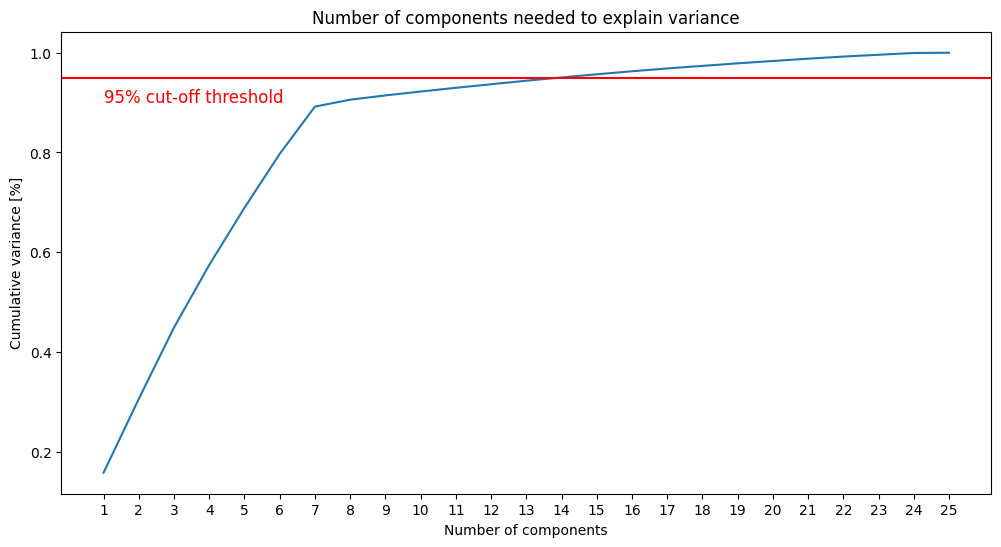

In [27]:
plt.figure(figsize=(12, 6))
xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.title("Number of components needed to explain variance")
plt.xlabel("Number of components")
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))
sns.lineplot(x=xi, y=y)
plt.ylabel("Cumulative variance [%]")
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.90, '95% cut-off threshold', color='red', fontsize=12)
plt.show()

In [28]:
pca2 = PCA(n_components=0.95)
X_pca = pca2.fit_transform(X)
X_pca.shape

(200, 14)

In [29]:
pca2.explained_variance_ratio_.sum()

0.950432373240188

# **T-SNE**

In [30]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X)

<ipython-input-31-ff6abf5df79d>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=tsne_df, palette='coolwarm')


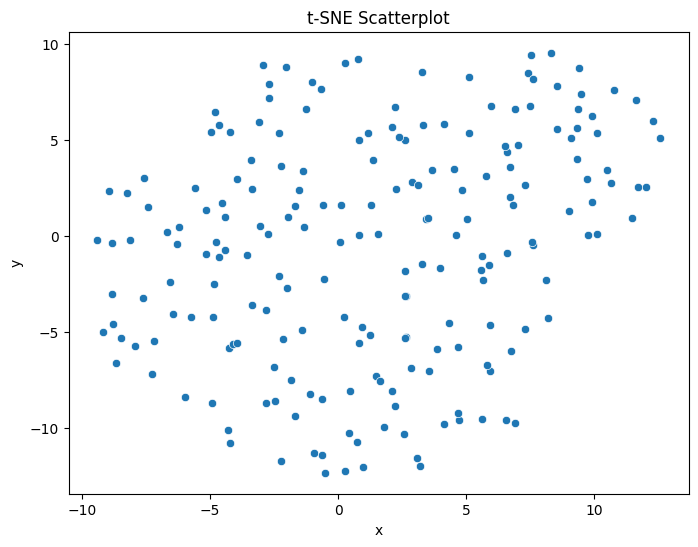

In [31]:
tsne_df = pd.DataFrame(X_tsne, columns=['x', 'y'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=tsne_df, palette='coolwarm')
plt.title('t-SNE Scatterplot')
plt.show()

In [32]:
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(X)
tsne_combined = TSNE()
X_tsne_combined = tsne_combined.fit_transform(X_pca_2c)

<ipython-input-33-0f715d5076ac>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', data=tsne_combined_df, palette='coolwarm')


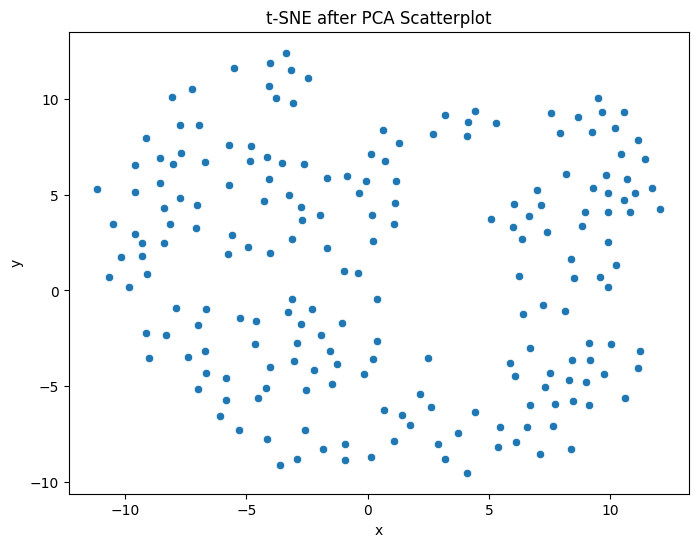

In [33]:
tsne_combined_df = pd.DataFrame(X_tsne_combined, columns=['x', 'y'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=tsne_combined_df, palette='coolwarm')
plt.title('t-SNE after PCA Scatterplot')
plt.show()

# **Faza** 4

In [34]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [35]:
group1_column = numerical_columns[0]
group2_column = numerical_columns[1]

group1 = df[group1_column].dropna()
group2 = df[group2_column].dropna()

In [36]:
# Shapiro-Wilk
print(f"Shapiro-Wilk test za kolonu '{group1_column}':")
stat, p_value = stats.shapiro(group1)
print(f"P-vrednost: {p_value:.4f}")
if p_value > 0.05:
    print(f"Kolona '{group1_column}' je normalno distribuirana.\n")
else:
    print(f"Kolona '{group1_column}' nije normalno distribuirana.\n")

print(f"Shapiro-Wilk test za kolonu '{group2_column}':")
stat, p_value = stats.shapiro(group2)
print(f"P-vrednost: {p_value:.4f}")
if p_value > 0.05:
    print(f"Kolona '{group2_column}' je normalno distribuirana.\n")
else:
    print(f"Kolona '{group2_column}' nije normalno distribuirana.\n")

Shapiro-Wilk test za kolonu 'Year':
P-vrednost: 0.0000
Kolona 'Year' nije normalno distribuirana.

Shapiro-Wilk test za kolonu 'GDP (USD)':
P-vrednost: 0.0000
Kolona 'GDP (USD)' nije normalno distribuirana.



In [37]:
# Mann-Whitney test
print(f"Mann-Whitney U-test između '{group1_column}' i '{group2_column}':")
u_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U-test P-vrednost: {p_value:.10f}")


Mann-Whitney U-test između 'Year' i 'GDP (USD)':
Mann-Whitney U-test P-vrednost: 0.0000000000


In [38]:
print(f"Srednja vrednost grupe 1: {group1.mean()}, Grupa 2: {group2.mean()}")
print(f"Standardna devijacija grupe 1: {group1.std()}, Grupa 2: {group2.std()}")

Srednja vrednost grupe 1: 2014.5, Grupa 2: 10568674550000.0
Standardna devijacija grupe 1: 2.879489066906169, Grupa 2: 5547703222772.702


In [39]:
# Cohen-ov test
s = sqrt(((len(group1) - 1) * stdev(group1) ** 2 + (len(group2) - 1) * stdev(group2) ** 2) / (len(group1) + len(group2) - 2))
cohens_d = (mean(group1) - mean(group2)) / s
print(f"Cohen-ov d između '{group1_column}' i '{group2_column}': {cohens_d:.4f}")
if abs(cohens_d) < 0.2:
    print("Veličina efekta je mala.")
elif abs(cohens_d) < 0.5:
    print("Veličina efekta je srednja.")
else:
    print("Veličina efekta je velika.")

Cohen-ov d između 'Year' i 'GDP (USD)': -2.6942
Veličina efekta je velika.


In [40]:
mean_val = mean(group1)
std_dev = stdev(group1)
n = len(group1)
z_value = norm.ppf(0.975)
margin_error = z_value * (std_dev / sqrt(n))
conf_interval = (mean_val - margin_error, mean_val + margin_error)
print(f"95% Interval poverenja za kolonu '{group1_column}': {conf_interval}")

95% Interval poverenja za kolonu 'Year': (2014.1009305090001, 2014.8990694909999)


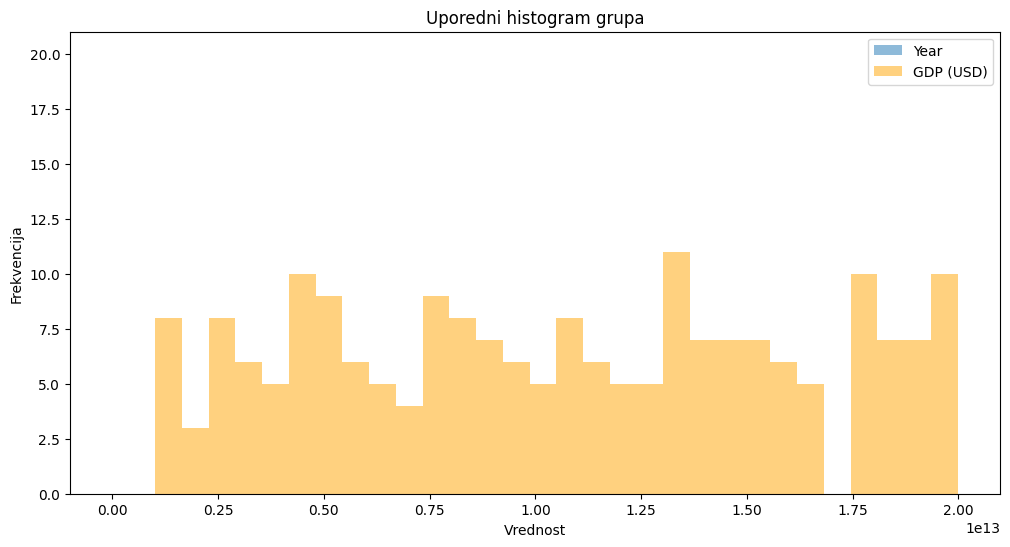

In [41]:
plt.figure(figsize=(12, 6))
plt.hist(group1, bins=30, alpha=0.5, label=f'{group1_column}')
plt.hist(group2, bins=30, alpha=0.5, label=f'{group2_column}', color='orange')
plt.title("Uporedni histogram grupa")
plt.xlabel("Vrednost")
plt.ylabel("Frekvencija")
plt.legend()
plt.show()